Populating the interactive namespace from numpy and matplotlib


,Location,International Rank,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall Score
Institution Name,,,,,,,,,
MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,1,100.0,100.0,100.0,99.9,100.0,96.1,100.0
STANFORD UNIVERSITY,United States,2,100.0,100.0,100.0,99.4,99.6,72.7,98.7
HARVARD UNIVERSITY,United States,3,100.0,100.0,98.3,99.9,96.5,75.2,98.4
CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,4,99.5,85.4,100.0,100.0,93.4,89.2,97.7
UNIVERSITY OF CAMBRIDGE,United Kingdom,5,100.0,100.0,100.0,78.3,97.4,97.7,95.6
UNIVERSITY OF OXFORD,United Kingdom,6,100.0,100.0,100.0,76.3,98.6,98.5,95.3
UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,7,99.7,99.5,99.1,74.7,96.6,100.0,94.6
IMPERIAL COLLEGE LONDON,United Kingdom,8,99.4,100.0,100.0,68.7,100.0,100.0,93.7
UNIVERSITY OF CHICAGO,United States,9,99.9,92.9,96.5,85.9,71.9,79.8,93.5


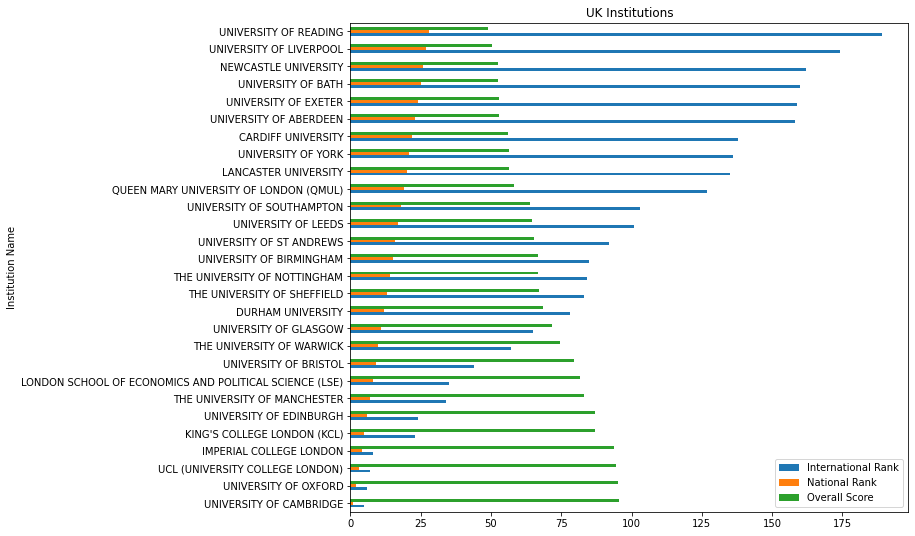

In [1]:
# CELL1 – 3 marks
################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################
df = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx')
df.rename(columns={'Rank': 'International Rank'}, inplace=True)
top_ten = df[df['International Rank'].values < 11]
top_ten1 = top_ten.set_index('Institution Name')
display(top_ten1)
df = df[df['Location'] == 'United Kingdom']
df.reset_index(drop=True,inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index': 'National Rank'}, inplace=True)
df['National Rank'] += 1
df = df[['Institution Name','International Rank','National Rank','Overall Score']]
ax = df.plot.barh(x = 'Institution Name',title = 'UK Institutions',figsize=(10,9))

In order to test if any of the data produced was statistically significant, I first checked if the error bars on the bar    chart overlapped, which they did. I then performed a shapiro test on each of the data sets to see if any data pairs were    both normal. This was not the case, so the Mann-Whitney U test was the test that I would be using to check for the          statistically significant data. All of these values were greater than 0.05, so no data sets were statistically significant.


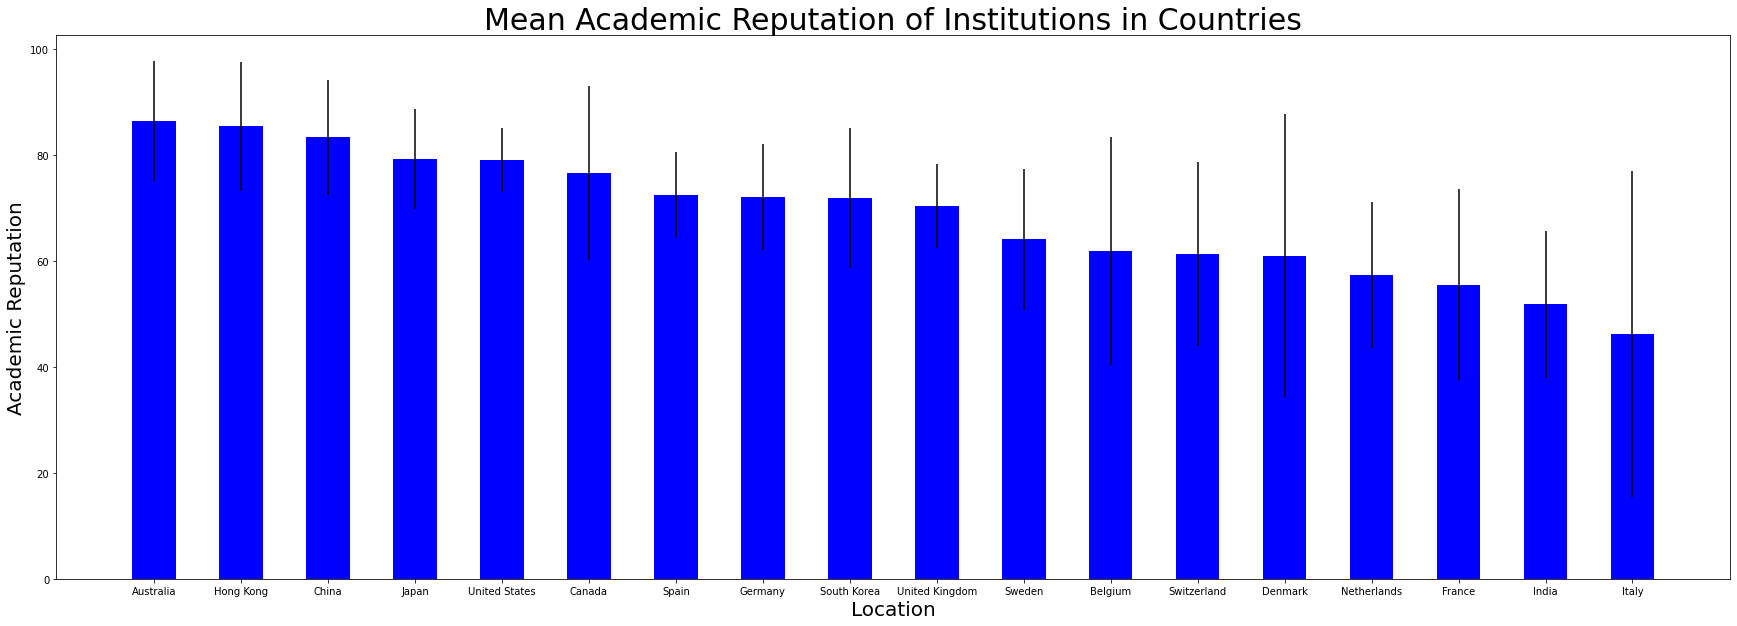

In [12]:
# CELL2 – 3 marks
df2 = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx')
df2 = df2.set_index('Institution Name')
a = list(df2.Location.value_counts().loc[lambda x: x<3].index)
b = df2[df2.Location.isin(a) == False]
d = b.groupby(['Location'])['Academic Reputation']
datasets = []
for group in d:
    datasets.append(group[1].values)
standarddevs=d.std().values
means=d.mean()
n = d.count()
lowers = []
for i in range(0,len(means)):
    rootn = sqrt(n.values[i])
    lowers.append(round((1.96*(standarddevs[i]/rootn)),2))
result = pd.DataFrame(round(means,2))
result["Deviation"] = lowers
result["Data"] = datasets
finaltable = result.sort_values(by=['Academic Reputation'], ascending=False)
finaltable.reset_index(inplace=True)
barwidth = 0.5
for i in range(-1,len(finaltable['Data'])-1):
    try:
        diff = stats.mannwhitneyu(finaltable['Data'][i],finaltable['Data'][i+1],alternative='two-sided')[1]
    except:
        diff = 0
    
    if diff < 0.05 and diff > 0:
        plt.bar(i+1, finaltable['Academic Reputation'][i+1], color ='r', width = barwidth,yerr=finaltable['Deviation'].values[i+1])

    else:
        plt.bar(i+1,finaltable['Academic Reputation'][i+1],color='b',width=barwidth,yerr=finaltable['Deviation'].values[i+1])
xlabel('Location',fontsize=20)
ylabel('Academic Reputation',fontsize=20)
plt.xticks(arange(len(finaltable["Location"].values)),list(finaltable["Location"].values))
figsize(30,10)
title("Mean Academic Reputation of Institutions in Countries",fontsize=30)
print("In order to test if any of the data produced was statistically significant, I first checked if the error bars on the",
      "bar    chart overlapped, which they did. I then performed a shapiro test on each of the data sets to see if any",
     "data pairs were    both normal. This was not the case, so the Mann-Whitney U test was the test that I would be using",
     "to check for the          statistically significant data. All of these values were greater than 0.05, so no data sets were",
     "statistically significant.")

In [3]:
# CELL3 – 4 marks
df3 = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx')
df4 = df3[df3['Location'] != 'United Kingdom']
OS = df4[['Overall Score']]
dis = df3[df3['Location'] == 'United Kingdom']
OSpredict = dis['Overall Score']
def modelcreate(OS,OSpredict,modeldata,predictdata):
    modeldata=sm.add_constant(modeldata)
    results=sm.OLS(OS, modeldata).fit()
    predictdata = sm.add_constant(predictdata)
    MSE = round(np.square(np.subtract(results.predict(predictdata).values,OSpredict.values)).mean(),2)
    coefficients = []
    for i in range(0,len(results.params)):
        coefficients.append(round(results.params[i],2))
    return MSE,coefficients
model1 = modelcreate(OS,OSpredict,df4[['Academic Reputation','Faculty Student','Citations per Faculty']],dis[['Academic Reputation','Faculty Student','Citations per Faculty']])
model2 = modelcreate(OS,OSpredict,df4[['Academic Reputation','Faculty Student']],dis[['Academic Reputation','Faculty Student']])
model3 = modelcreate(OS,OSpredict,df4[['Academic Reputation','Citations per Faculty']],dis[['Academic Reputation','Citations per Faculty']])
model4 = modelcreate(OS,OSpredict,df4[['Faculty Student','Citations per Faculty']],dis[['Faculty Student','Citations per Faculty']])
MSEs = [model1[0],model2[0],model3[0],model4[0]]
model1eq = "OS = "+str(model1[1][1])+"*AR + "+str(model1[1][2])+"*FS + "+str(model1[1][3])+"*CPF + "+str(model1[1][0])
model2eq = "OS = "+str(model2[1][1])+"*AR + "+str(model2[1][2])+"*FS + "+str(model2[1][0])
model3eq = "OS = "+str(model3[1][1])+"*AR + "+str(model3[1][2])+"*CPF + "+str(model3[1][0])
model4eq = "OS = "+str(model4[1][1])+"*AR + "+str(model4[1][2])+"*CPF + "+str(model4[1][0])
print("Model 1: "+model1eq)
print("Model 2: "+model2eq)
print("Model 3: "+model3eq)
print("Model 4: "+model4eq)
equations = [model1eq,model2eq,model3eq,model4eq]
framedata = [[model1[0],model1eq],[model2[0],model2eq],[model3[0],model3eq],[model4[0],model4eq],]
MSEtable = pd.DataFrame(framedata, columns=['MSE', 'Test Equation'])
MSEtable = MSEtable.set_index('Test Equation')
display(MSEtable)
print("In conclusion, the models produced a range of MSEs and models 1 and 2 had normal distributions, therefore",
      "I think the most  suitable model due to the small MSE value is model 2")

Model 1: OS = 0.49*AR + 0.21*FS + 0.22*CPF + 4.6
Model 2: OS = 0.52*AR + 0.18*FS + 17.61
Model 3: OS = 0.49*AR + 0.19*CPF + 18.5
Model 4: OS = 0.2*AR + 0.27*CPF + 37.2


,MSE
Test Equation,
OS = 0.49*AR + 0.21*FS + 0.22*CPF + 4.6,24.71
OS = 0.52*AR + 0.18*FS + 17.61,22.45
OS = 0.49*AR + 0.19*CPF + 18.5,49.20
OS = 0.2*AR + 0.27*CPF + 37.2,117.92


In conclusion, the models produced a range of MSEs and models 1 and 2 had normal distributions, therefore I think the most  suitable model due to the small MSE value is model 2


NOTE, the work is based on the alternative LBP calculation 


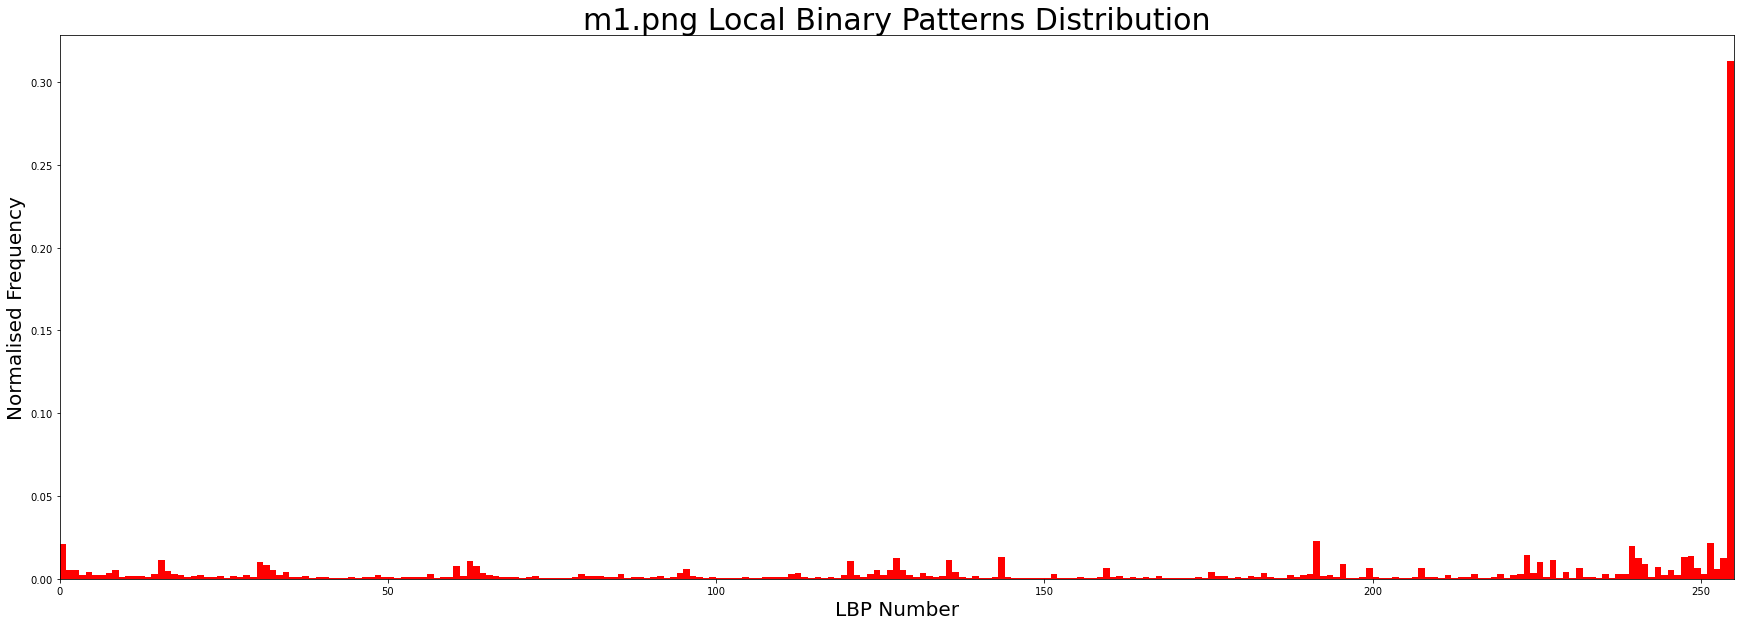

In [4]:
# CELL4 – 3 marks
print ('NOTE, the work is based on the alternative LBP calculation ')
img=imread('m1.png')*255
height = len(img[0])
width = len(img)
def bitget(img, centre, coordx, coordy):
    bit = 0
    try:
        if img[coordx][coordy] >= centre:
            bit = 1
    except:
        pass
    return bit

def LBPcalc(img, x, y):
    centre = img[x][y]
    LBPvals = []
    LBPvals.append(bitget(img, centre, x-1, y-1))
    LBPvals.append(bitget(img, centre, x-1, y))
    LBPvals.append(bitget(img, centre, x-1, y + 1))
    LBPvals.append(bitget(img, centre, x, y + 1))
    LBPvals.append(bitget(img, centre, x + 1, y + 1))
    LBPvals.append(bitget(img, centre, x + 1, y))
    LBPvals.append(bitget(img, centre, x + 1, y-1))
    LBPvals.append(bitget(img, centre, x, y-1))
    count = 0
    for i in range(len(LBPvals)):
        count += LBPvals[i] * (2**i)
    return count

values = []
for i in range(0, height):
    for j in range(0, width):
        values.append(LBPcalc(img, i, j))

bins = arange(0,256,1)
xlabel('LBP Number',fontsize=20)
ylabel('Normalised Frequency',fontsize=20)
xlim(0,255)
figsize(30,15)
title('m1.png Local Binary Patterns Distribution',fontsize=30)
img1 = hist(values, bins, color='r',density=True)

NOTE, the work is based on the alternative LBP calculation 

Enter in the number of the test image: 4
The estimated image quality is:  4.65
As a Pearson Correlation Coefficient ranges between 0 and 1, there is evidence of a strong positive correlation between my  algorithm generated values and the true image quality


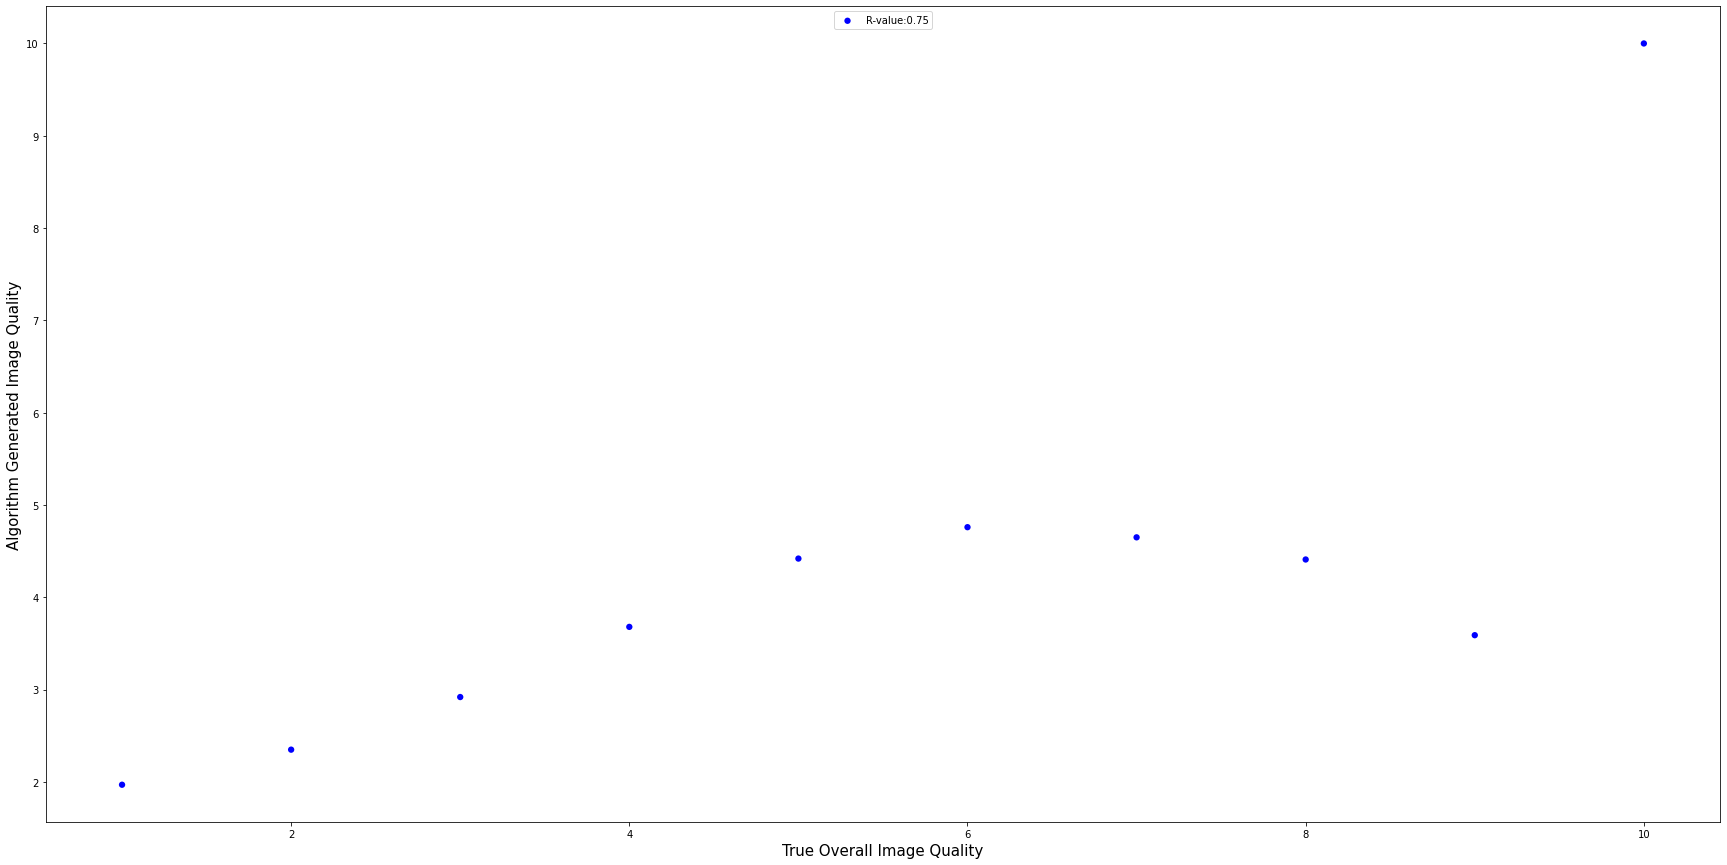

<Figure size 720x720 with 0 Axes>

In [5]:
# CELL5 – 4 marks
print ('NOTE, the work is based on the alternative LBP calculation ')
print()
def piccalc(imgnum,img1):
    input_img = imread('m'+imgnum+'.png')*255
    input_img_values = []
    for i in range(0, len(input_img)):
        for j in range(0, len(input_img[i])):
            input_img_values.append(LBPcalc(input_img,i,j))
    input_hist = hist(input_img_values,bins,density=True)[0]
    plt.close()
    a = img1[0]-input_hist
    a = a*a
    a_sum = sum(a)
    if a_sum == 0:
        similarity = 10
    else:
        similarity = round((a_sum*50),2)
    return similarity
filenametest = input("Enter in the number of the test image: ")
print("The estimated image quality is: ",piccalc(filenametest,img1))
imgvals = []
for i in range(1,11):
    imgvals.append(piccalc(str(i),img1))
true_qual_file = pd.read_excel('./Q_scores.xlsx')
qual_values = true_qual_file['Quality'].values
r_value = str(round(stats.pearsonr(array(qual_values),array(imgvals))[0],2))
scattergraph = plt.scatter(qual_values, imgvals, s=40, c='b', marker='o', edgecolors='none',label='R-value:'+r_value)
legend(handles=[scattergraph],loc=9)
xlabel('True Overall Image Quality', fontsize=15)
ylabel('Algorithm Generated Image Quality', fontsize=15)
figure(figsize(10,10))
print("As a Pearson Correlation Coefficient ranges between 0 and 1, there is evidence of a strong positive correlation",
      "between my  algorithm generated values and the true image quality")

Enter the test image number: 5
The estimated image quality for this image is:  183.85


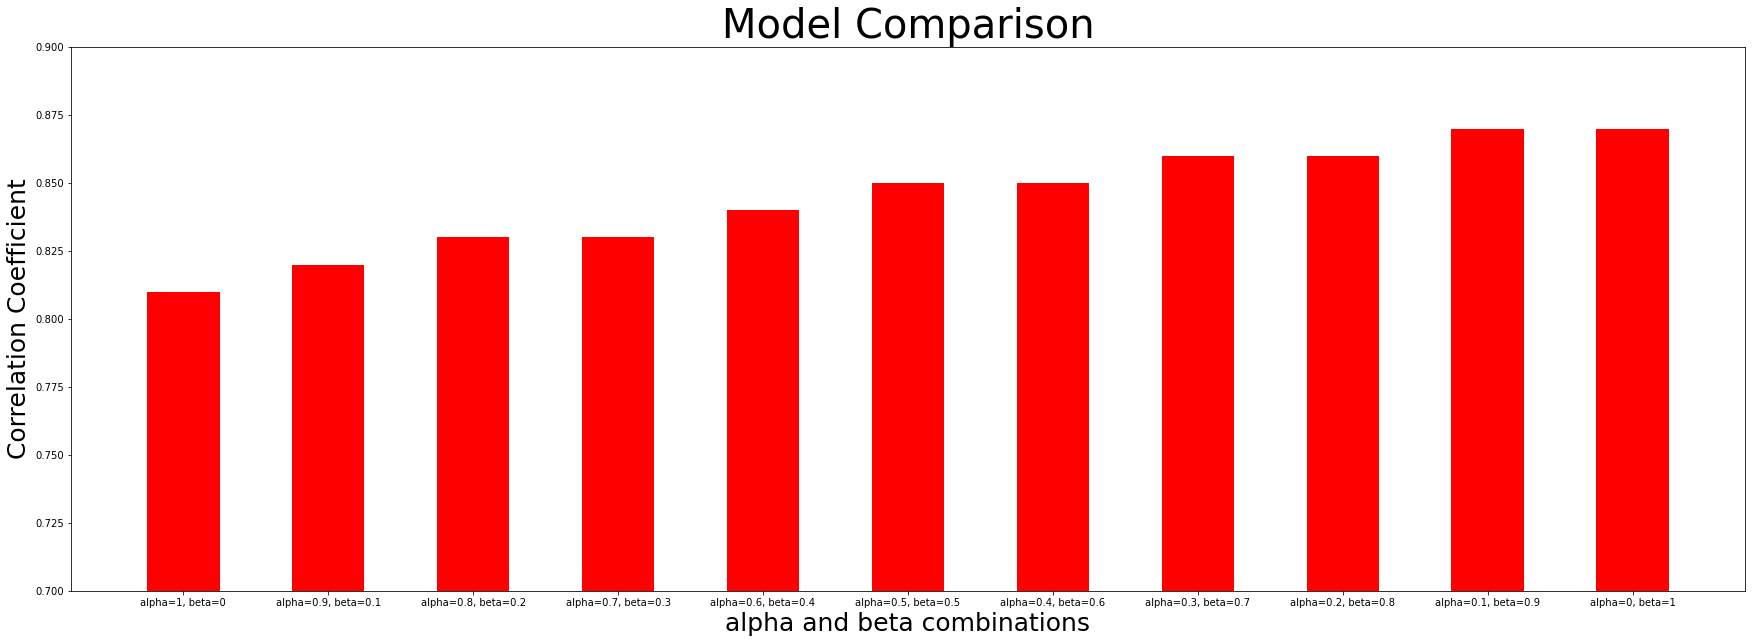

In [7]:
# CELL6 – 3 marks
input_img = input("Enter the test image number: ")
def pixelcalc(imgnum):
    img = imread('m'+imgnum+'.png')*255 
    img.flatten()
    meanpixel = mean(img)
    medianpixel = median(img)
    return meanpixel,medianpixel
b = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
a = b[::-1]
qual_values = true_qual_file['Quality'].values
correlations = []
xaxis = []
barwidth = 0.5
def correlationpop(a,b):
    for i in range(0,len(a)):
        tempvals = []
        for j in range(1,len(qual_values)+1):
            mean = pixelcalc(str(j))[0]
            median = pixelcalc(str(j))[1]
            qual = mean*b[i] + median*a[i]
            tempvals.append(qual)
        xaxis.append("alpha="+str(a[i])+", beta="+str(b[i]))
        correlations.append(round(stats.pearsonr(tempvals,qual_values)[0],2))
        plt.bar(i,round(stats.pearsonr(tempvals,qual_values)[0],2),color = 'r',width = barwidth)
correlationpop(a,b)
plt.xticks(arange(len(b)),xaxis)
figsize(30,10)
xlabel('alpha and beta combinations', fontsize=25)
ylabel('Correlation Coefficient', fontsize=25)
title('Model Comparison',fontsize=40)
plt.ylim(0.7,0.9)
def imagequal(correlations,input_img,a,b):
    largest = max(list(correlations))
    index = correlations.index(largest)
    value = (pixelcalc(input_img)[0]*a[index]) + (b[index]*(pixelcalc(input_img)[1]))
    print("The estimated image quality for this image is: ",round(value,2))
imagequal(correlations,input_img,a,b)

import scipy
print(scipy.__version__)